In [1]:
from datetime import date
from datetime import timedelta
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [2]:
def file_iterator(path: str, ext: str = ""):
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(ext):
                file_path = os.path.join(root, file)
                yield file_path, root, file

In [3]:
def load_data(path: str):
    dfs: list = []
    for file_path, _, _ in file_iterator(path, ".csv"):
        cur = pd.read_csv(file_path, index_col=None, header=0)
        dfs.append(cur)
        # print("Loaded data from: ", file_path)
    df = pd.concat(dfs, axis=0, ignore_index=True)
    return df

In [4]:
LOCAL_DIR_PREFIX = "/Users/moulicac/Documents/work/data/market/nse/downloads"
df = load_data(LOCAL_DIR_PREFIX)
df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,Unnamed: 13,Unnamed: 11
0,20MICRONS,EQ,31.45,31.90,30.55,30.75,30.70,31.20,76525,2369584.15,15-MAR-2013,412.0,INE144J01027,NaN,NaN
1,3IINFOTECH,EQ,6.50,6.60,6.35,6.40,6.40,6.50,481916,3122924.15,15-MAR-2013,1001.0,INE748C01020,NaN,NaN
2,3MINDIA,EQ,3570.00,3590.00,3330.00,3383.60,3414.90,3501.35,2822,9606472.35,15-MAR-2013,437.0,INE470A01017,NaN,NaN
3,A2ZMES,EQ,23.85,24.45,22.45,22.70,22.55,23.85,907233,21131745.70,15-MAR-2013,6345.0,INE619I01012,NaN,NaN
4,AANJANEYA,EQ,201.00,201.00,201.00,201.00,201.00,211.55,1761,353961.00,15-MAR-2013,45.0,INE928K01013,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8173950 entries, 0 to 8173949
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   SYMBOL       object 
 1   SERIES       object 
 2   OPEN         float64
 3   HIGH         float64
 4   LOW          float64
 5   CLOSE        float64
 6   LAST         float64
 7   PREVCLOSE    float64
 8   TOTTRDQTY    int64  
 9   TOTTRDVAL    float64
 10  TIMESTAMP    object 
 11  TOTALTRADES  float64
 12  ISIN         object 
 13  Unnamed: 13  float64
 14  Unnamed: 11  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 935.4+ MB


In [6]:
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8173950 entries, 0 to 8173949
Data columns (total 15 columns):
 #   Column       Dtype         
---  ------       -----         
 0   SYMBOL       object        
 1   SERIES       object        
 2   OPEN         float64       
 3   HIGH         float64       
 4   LOW          float64       
 5   CLOSE        float64       
 6   LAST         float64       
 7   PREVCLOSE    float64       
 8   TOTTRDQTY    int64         
 9   TOTTRDVAL    float64       
 10  TIMESTAMP    datetime64[ns]
 11  TOTALTRADES  float64       
 12  ISIN         object        
 13  Unnamed: 13  float64       
 14  Unnamed: 11  float64       
dtypes: datetime64[ns](1), float64(10), int64(1), object(3)
memory usage: 935.4+ MB


In [8]:
df = df.sort_values(by="TIMESTAMP", ascending=False)
df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,Unnamed: 13,Unnamed: 11
5032128,772GS2055,GS,116.85,116.86,116.85,116.86,116.86,111.30,43030,5.028466e+06,2020-12-01,13.0,IN0020150077,NaN,NaN
5032886,IDFCFIRSTB,NaN,10810.00,10843.00,10810.00,10843.00,10843.00,10830.00,24,2.598560e+05,2020-12-01,8.0,INE092T08CL7,NaN,NaN
5032792,HEG,EQ,808.30,811.20,798.10,803.10,802.50,804.70,314207,2.525133e+08,2020-12-01,14774.0,INE545A01016,NaN,NaN
5032793,HEIDELBERG,EQ,209.25,215.45,208.45,209.85,210.20,208.25,911305,1.937304e+08,2020-12-01,9757.0,INE578A01017,NaN,NaN
5032794,HEMIPROP,EQ,63.80,67.15,63.40,64.20,63.70,63.05,5490225,3.561004e+08,2020-12-01,17745.0,INE0AJG01018,NaN,NaN


In [9]:
ril_df = df[df["SYMBOL"] == "RELIANCE"].sort_values(by="TIMESTAMP").set_index("TIMESTAMP")
ril_df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN,Unnamed: 13,Unnamed: 11
TIMESTAMP,,,,,,,,,,,,,,
1994-11-03,RELIANCE,EQ,375.0,400.00,375.00,396.0,400.0,0.0,42650,16928112.5,NaN,NaN,NaN,NaN
1994-11-07,RELIANCE,EQ,396.0,398.25,393.00,395.5,396.0,396.0,58700,23214812.5,NaN,NaN,NaN,NaN
1994-11-08,RELIANCE,EQ,398.0,398.75,393.00,396.0,396.0,395.5,49050,19373862.5,NaN,NaN,NaN,NaN
1994-11-09,RELIANCE,EQ,399.0,399.00,385.75,387.0,387.5,396.0,57500,22520075.0,NaN,NaN,NaN,NaN
1994-11-10,RELIANCE,EQ,387.0,390.00,380.00,380.5,380.0,387.0,67250,25848275.0,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='TIMESTAMP'>

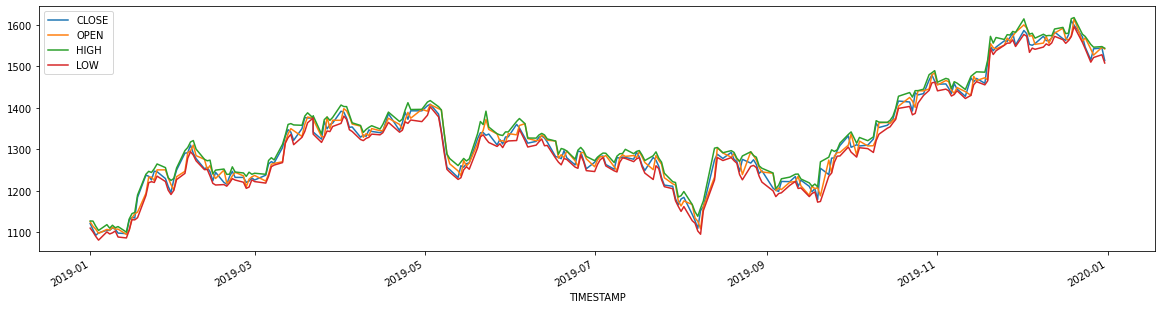

In [10]:
ril_df.loc["2019"][["CLOSE", "OPEN", "HIGH", "LOW"]].plot(figsize=(20,5))

<AxesSubplot:xlabel='TIMESTAMP'>

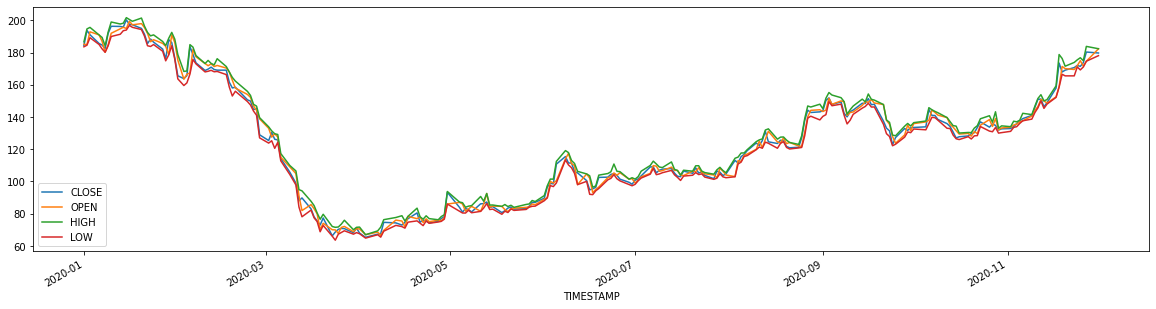

In [11]:
tm_df = df[df["SYMBOL"] == "TATAMOTORS"].sort_values(by="TIMESTAMP").set_index("TIMESTAMP")
tm_df.loc["2020"][["CLOSE", "OPEN", "HIGH", "LOW"]].plot(figsize=(20,5))

<AxesSubplot:xlabel='TIMESTAMP'>

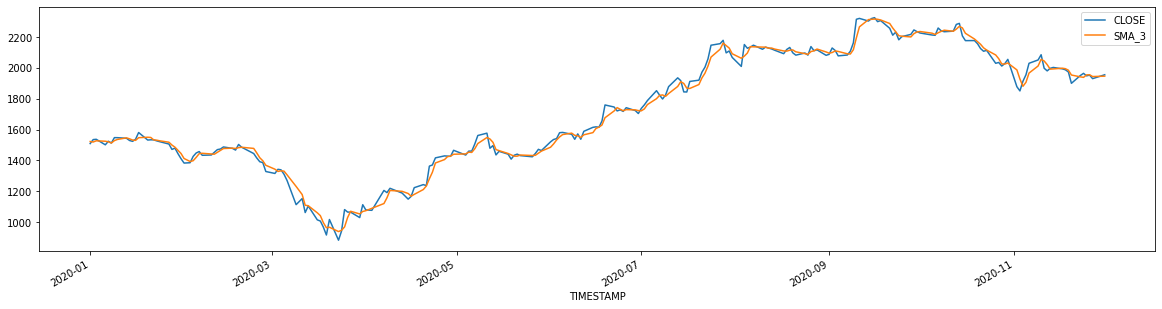

In [12]:
ril_df["SMA_3"] = ril_df.iloc[:, 5].rolling(window=3).mean()
ril_df.loc["2020"][["CLOSE", "SMA_3"]].plot(figsize=(20, 5))

In [13]:
ril_df.loc["2020"].head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN,Unnamed: 13,Unnamed: 11,SMA_3
TIMESTAMP,,,,,,,,,,,,,,,
2020-01-01,RELIANCE,EQ,1518.0,1527.10,1505.5,1509.60,1511.80,1514.05,6402372,9.701063e+09,122265.0,INE002A01018,NaN,NaN,1522.616667
2020-01-02,RELIANCE,EQ,1512.0,1540.95,1512.0,1535.30,1534.10,1509.60,8096561,1.239471e+10,151727.0,INE002A01018,NaN,NaN,1519.650000
2020-01-03,RELIANCE,EQ,1533.0,1541.65,1523.0,1537.15,1536.00,1535.30,9593498,1.470428e+10,149003.0,INE002A01018,NaN,NaN,1527.350000
2020-01-06,RELIANCE,EQ,1520.0,1527.90,1498.0,1501.50,1499.90,1537.15,11209343,1.695494e+10,225138.0,INE002A01018,NaN,NaN,1524.650000
2020-01-07,RELIANCE,EQ,1519.0,1534.50,1513.5,1524.60,1526.95,1501.50,7627191,1.161710e+10,180713.0,INE002A01018,NaN,NaN,1521.083333


In [14]:
from ta import add_all_ta_features
ta_data_ril = add_all_ta_features(ril_df, open="OPEN", high="HIGH", low="LOW", close="CLOSE", volume="TOTTRDQTY", fillna=True)
ta_data_ril.info()

/Users/moulicac/Documents/work/soft/python3/lib/python3.8/site-packages/ta/trend.py:643: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/Users/moulicac/Documents/work/soft/python3/lib/python3.8/site-packages/ta/trend.py:647: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9391 entries, 1994-11-03 to 2020-12-01
Data columns (total 98 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SYMBOL                     9391 non-null   object 
 1   SERIES                     9391 non-null   object 
 2   OPEN                       9391 non-null   float64
 3   HIGH                       9391 non-null   float64
 4   LOW                        9391 non-null   float64
 5   CLOSE                      9391 non-null   float64
 6   LAST                       9391 non-null   float64
 7   PREVCLOSE                  9391 non-null   float64
 8   TOTTRDQTY                  9391 non-null   int64  
 9   TOTTRDVAL                  9391 non-null   float64
 10  TOTALTRADES                2346 non-null   float64
 11  ISIN                       2346 non-null   object 
 12  Unnamed: 13                0 non-null      float64
 13  Unnamed: 11                0 n

<AxesSubplot:xlabel='TIMESTAMP'>

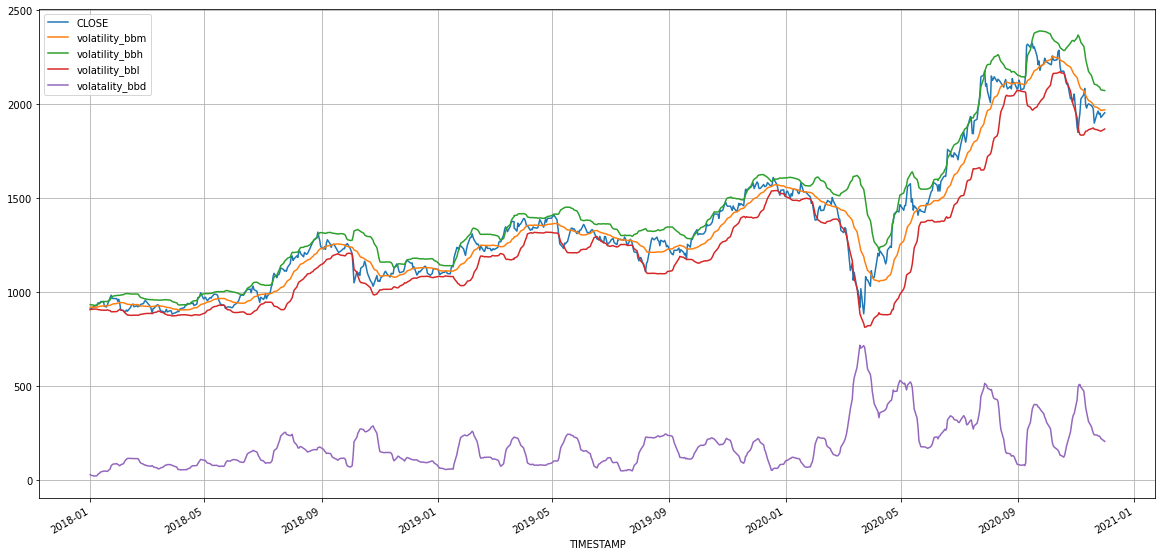

In [15]:
ta_data_ril["volatality_bbd"] = ta_data_ril["volatility_bbh"] - ta_data_ril["volatility_bbl"]
ta_data_ril.loc["2018":"2020"][["CLOSE", "volatility_bbm", "volatility_bbh", "volatility_bbl", "volatality_bbd"]].plot(grid=True, figsize=(20, 10))

/Users/moulicac/Documents/work/soft/python3/lib/python3.8/site-packages/ta/trend.py:643: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/Users/moulicac/Documents/work/soft/python3/lib/python3.8/site-packages/ta/trend.py:647: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


<AxesSubplot:xlabel='TIMESTAMP'>

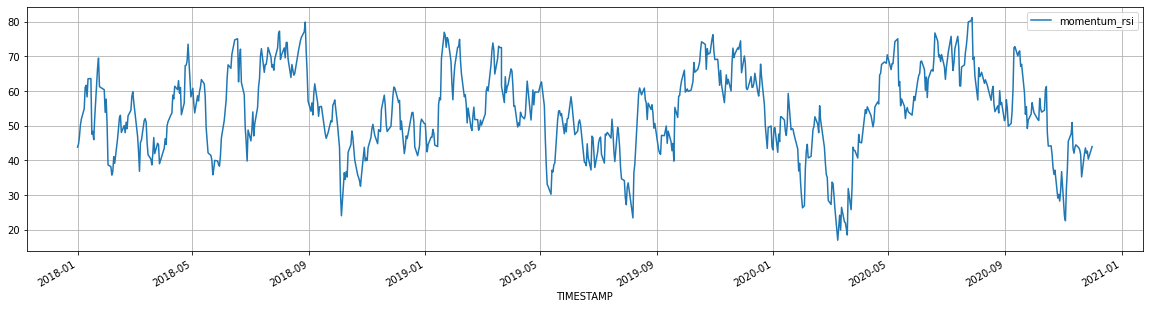

In [19]:
symbol = "RELIANCE"
symbol_df = df[df["SYMBOL"] == symbol].sort_values(by="TIMESTAMP").set_index("TIMESTAMP")
ta_data_symbol = add_all_ta_features(symbol_df, open="OPEN", high="HIGH", low="LOW", close="CLOSE", volume="TOTTRDQTY", fillna=True)
ta_data_symbol["volatality_bbd"] = ta_data_symbol["volatility_bbh"] - ta_data_symbol["volatility_bbl"]
# ta_data_symbol.loc["2018":"2020"][["CLOSE", "volatility_bbm", "volatility_bbh", "volatility_bbl", "volatality_bbd"]].plot(grid=True, figsize=(20, 10))
ta_data_symbol.loc["2018":"2020"][["momentum_rsi"]].plot(grid=True, figsize=(20, 5))
# ta_data_symbol.loc["2020"][["trend_adx", "trend_adx_pos", "trend_adx_neg"]].plot(grid=True, figsize=(20, 5))